**Descripción**

# **Proyecto 2-Parte I (Core)**

## **Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.


**1. Búsqueda de Conjuntos de Datos:**

Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

**About Dataset**


1999-2017. Centers for Disease Control and Prevention (CDC). State Tobacco Activities Tracking and Evaluation (STATE) System. YTS Data. The YTS was developed to provide states with comprehensive data on both middle school and high school students regarding tobacco use, exposure to environmental tobacco smoke, smoking cessation, school curriculum, minors' ability to purchase or otherwise obtain tobacco products, knowledge and attitudes about tobacco, and familiarity with pro-tobacco and anti-tobacco media messages.

In [4]:
# Importamos las libretias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '../Datasets/dataset1.csv'
df = pd.read_csv(path)

## **1. Análisis Estadístico Descriptivo:**

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

* Analizar la distribución de las variables categóricas.

In [5]:
# Exploramos los datos
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


* Identificación de Valores Nulos y Outliers:

* Detectar valores nulos y discutir cómo podrían ser tratados.

* Identificar outliers y evaluar su impacto potencial en el análisis


In [6]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Data_Value_Footnote,517,10083,95.12
Data_Value_Footnote_Symbol,517,10083,95.12
Response,8190,2410,22.74
Data_Value,10080,520,4.91
Data_Value_Std_Err,10080,520,4.91
Sample_Size,10080,520,4.91
High_Confidence_Limit,10080,520,4.91
Low_Confidence_Limit,10083,517,4.88
GeoLocation,10596,4,0.04
DataSource,10600,0,0.00


In [7]:
# Remove columnas especificas y manejamos los valores faltantes
columns_to_remove = ['Data_Value_Footnote', 'Data_Value_Footnote_Symbol','Sample_Size','Age', 'Race', 'StratificationID1', 'StratificationID2', 'StratificationID3']
df_cleaned = df.drop(columns=columns_to_remove)


for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode
    elif df[column].dtype in ['float64', 'int64']:  # For numeric columns
        df[column].fillna(df[column].mean(), inplace=True)  # Fill with mean

C:\Users\damav\AppData\Local\Temp\ipykernel_37708\2608978100.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)  # Fill with mean
C:\Users\damav\AppData\Local\Temp\ipykernel_37708\2608978100.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [8]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
YEAR,10600,0,0.0
LocationAbbr,10600,0,0.0
LocationDesc,10600,0,0.0
TopicType,10600,0,0.0
TopicDesc,10600,0,0.0
MeasureDesc,10600,0,0.0
DataSource,10600,0,0.0
Response,10600,0,0.0
Data_Value_Unit,10600,0,0.0
Data_Value_Type,10600,0,0.0


In [9]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [10]:
# Estatísticas descriptivas
df.describe()


,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,20.642470,1.733291,18.116434,23.386225,2135.178389,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.200000,0.600000,1.900000,4.600000,683.000000,7.000000
50%,2006.000000,11.800000,1.400000,8.900000,14.700000,1046.500000,9.000000
75%,2011.000000,33.925000,2.300000,28.000000,39.325000,1607.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


In [11]:
# Tipos de datos
df.dtypes


YEAR                            int64
LocationAbbr                   object
LocationDesc                   object
TopicType                      object
TopicDesc                      object
MeasureDesc                    object
DataSource                     object
Response                       object
Data_Value_Unit                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Data_Value_Std_Err            float64
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Gender                         object
Race                           object
Age                            object
Education                      object
GeoLocation                    object
TopicTypeId                    object
TopicId                        object
MeasureId                      object
StratificationID1              object
Stratificati

In [12]:
# Convertimos a categoricas
categorical_cols = [
    'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc', 
    'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit', 
    'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 
    'Gender', 'Race', 'Age', 'Education', 'GeoLocation', 
    'TopicTypeId', 'TopicId', 'MeasureId'
]

# Convertimos a categorias
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nDistribution of Categorical Columns:")
for col in categorical_cols:
    print(f"\nDistribution for '{col}':")
    print(df[col].value_counts())


Distribution of Categorical Columns:

Distribution for 'LocationAbbr':
LocationAbbr
MS    651
AL    426
NJ    411
WI    408
CT    405
NC    402
ND    378
WV    378
DE    354
SC    348
OK    342
PA    330
MO    318
HI    312
GA    303
OH    303
LA    288
IN    288
IL    282
IA    276
AZ    264
NE    258
KY    255
SD    234
AR    210
KS    186
NH    180
MN    177
TN    168
RI    144
UT    144
MI    138
FL     96
CA     96
MD     96
VI     96
VT     96
NY     90
GU     48
ID     48
CO     48
DC     48
ME     48
MA     48
TX     48
VA     45
US     34
NM     24
WY     24
PR      6
Name: count, dtype: int64

Distribution for 'LocationDesc':
LocationDesc
Mississippi                 651
Alabama                     426
New Jersey                  411
Wisconsin                   408
Connecticut                 405
North Carolina              402
North Dakota                378
West Virginia               378
Delaware                    354
South Carolina              348
Oklahoma              

Podemos observar valors anomalos para ciertas columnas como Sample_sise. Desoues podemos observar una desviación estandar estable por lo que podemos conisderar al promedio representativo.


**3. Visualizaciones:**

* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

* Visualizar las correlaciones entre variables (mapa de calor de correlación).

Resumen de Hallazgos:
Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

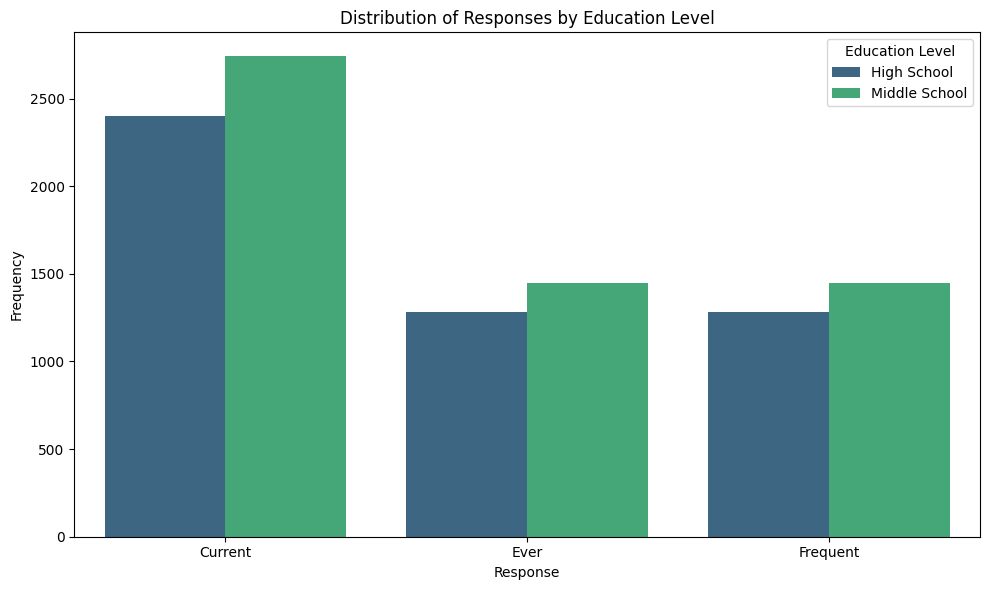

In [13]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', hue='Education', data=df, palette='viridis')
plt.title('Distribution of Responses by Education Level')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()